# CW CMF SOL-USD 2022

In [324]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [325]:
data = yf.download("SOL-USD", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  1 of 1 completed


### Data summary Statistic 

In [326]:
 data.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,366.00,366.00,366.00,366.00,366.00,3.660000e+02
mean,97.35,102.27,92.34,97.51,97.51,1.899262e+09
std,71.45,74.02,68.20,71.22,71.22,1.918293e+09
min,12.57,13.08,11.49,12.61,12.61,6.422934e+07
25%,32.95,35.01,31.14,33.04,33.04,4.754669e+08
50%,85.18,92.13,81.22,85.99,85.99,1.552719e+09
75%,159.70,168.49,150.92,159.08,159.08,2.688638e+09
max,258.78,260.06,246.12,258.93,258.93,1.706864e+10


In [327]:
 data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-28,13.207767,13.779016,11.489983,13.089247,13.089247,300493226
2021-03-01,13.108435,15.516057,13.057385,14.955588,14.955588,306451693
2021-03-02,14.966845,15.224125,13.460749,13.958921,13.958921,178549852
2021-03-03,13.963540,14.729359,13.767049,14.115591,14.115591,153830742
2021-03-04,14.094867,14.260361,12.771270,13.097983,13.097983,116364466


In [328]:
 data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,84.863579,92.279396,76.859573,89.194748,89.194748,5253578948
2022-02-25,89.228134,94.777809,87.276161,92.598824,92.598824,3069242551
2022-02-26,92.608864,94.604332,89.757675,90.141563,90.141563,1721041901
2022-02-27,90.124634,91.989433,84.492928,85.519051,85.519051,2012522473
2022-02-28,85.501106,101.041794,84.575844,99.520348,99.520348,3457872746


In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-02-28 to 2022-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Close      366 non-null    float64
 4   Adj Close  366 non-null    float64
 5   Volume     366 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


In [330]:
data.diff().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01,-0.099332,1.737041,1.567403,1.866342,1.866342,5958467.0
2021-03-02,1.858410,-0.291932,0.403363,-0.996667,-0.996667,-127901841.0
2021-03-03,-1.003304,-0.494766,0.306300,0.156670,0.156670,-24719110.0
2021-03-04,0.131327,-0.468998,-0.995779,-1.017608,-1.017608,-37466276.0


In [331]:
data.diff().describe().head()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,0.198064,0.239076,0.200235,0.236798,0.236798,8.650355e+06
std,7.353744,6.431978,7.073718,7.132275,7.132275,1.147691e+09
min,-23.809296,-26.314560,-35.776199,-23.227829,-23.227829,-5.588748e+09
25%,-2.393005,-2.527336,-1.834703,-2.482172,-2.482172,-3.180393e+08


### Adjusted close price 

In [332]:
ADJ =  data['Adj Close']

<AxesSubplot:xlabel='Date'>

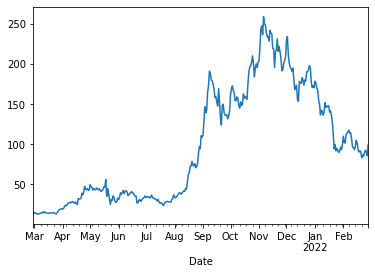

In [333]:
ADJ.plot()

In [334]:
ADJ.describe().round(2)      # we have calculate the daily return of SOL-USD

count    366.00
mean      97.51
std       71.22
min       12.61
25%       33.04
50%       85.99
75%      159.08
max      258.93
Name: Adj Close, dtype: float64

In [335]:
rets = np.log(ADJ/ ADJ.shift(1))       # We have calculated log return Today's price/ yesterday's price 
rets.head().round(4)                   

Date
2021-02-28       NaN
2021-03-01    0.1333
2021-03-02   -0.0690
2021-03-03    0.0112
2021-03-04   -0.0748
Name: Adj Close, dtype: float64

### Log return 

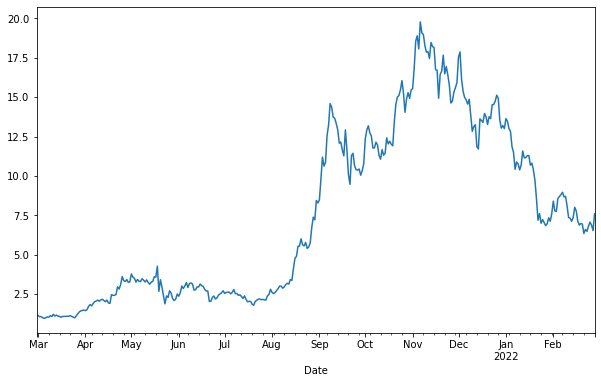

In [336]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));    # that is the exponential function figure of the return

In [337]:
 normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.14258586659303013,
 -0.06664177199554829,
 0.011223619063755595,
 -0.07209104353883146,
 -0.037222542710982506]

In [338]:
log_return = []                       # we use the log return to calibrate the volatility 
for i in range(0,len(data)-1):                                  
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.13329399771748274,
 -0.0689661989807534,
 0.011161101597876017,
 -0.07482165827044047,
 -0.03793298704797165]

### Annualized return and volatility 

In [339]:
datanr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = datanr.mean() * len(datanr)
nv = datanr.std() * (len(datanr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 3.06642759 and its annulized volatility is 1.44029037


In [340]:
datalr = pd.DataFrame(log_return, columns = ['log'])          #We have calculate the volatility for 1 year 
lr = datalr.mean() * len(datalr)
lv = datalr.std() * (len(datalr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 2.02857109 and its annulized volatility is 1.44019508


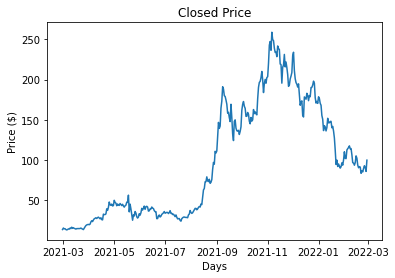

In [341]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(data['Close'])
plt.xlabel('Days')                                 
plt.ylabel('Price ($)')
plt.title('Closed Price');

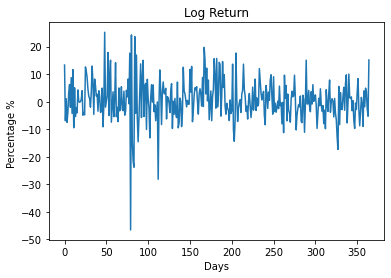

In [342]:
fig = plt.figure()
plt.plot(datalr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

(<AxesSubplot:xlabel='Date'>,)

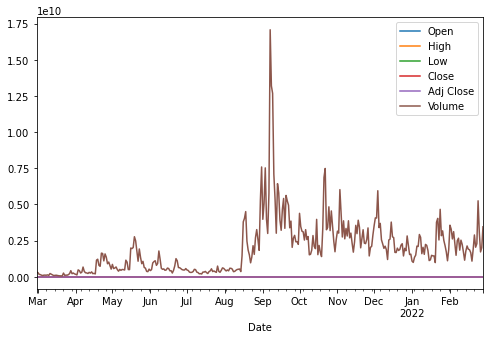

In [442]:
data.plot(figsize=(8, 5)),

# Monte Carlo Simulation

In [357]:
SP = data['Adj Close'][-1]                    
print('The spot price is $', round(SP,2))

The spot price is $ 99.52


In [358]:
S0 = 99.52                    # Last close price of SOLANA ( SOL-USD) on March 1st 2022 
K = 120.0                     # strike price 
T = 1/52                      # maturity is 1 week 
r = 0.017                     # risk free rate 
sig = 1.44                    # sig is the volatility,
N = 3                         # the number of time steps   
payoff = "put"                # payoff 




 ### MCS for European option 

In [359]:
def mcs_simulation_np(m,n):         # Monte Carlo simulation method
    M = m             # number of time steps
    I = n             # number of simulations
    dt = T / M        # The size of time step for each simulation in 1 week
    S = np.zeros((M + 1, I)) # We created the Matrix for the underlying asset Price
    S[0] = S0         # The spot price on March 3 2022
    rn = np.random.standard_normal(S.shape) # rn is a standard normally distributed random number 
    for t in range(1, M + 1):                
        S[t] = S[t-1] * np.exp((r - sig ** 2 / 2) * dt + sig * np.sqrt(dt) * rn[t]) 
    return S                # S(t) is the value of the underlying at time t

### Data input 

In [445]:
T = 1/52           # the set up time is 1 week 
r = 0.017          # the risk free rate is 1.7%
sigma = 1.44       # The  volatility is 144% 
S0 = 99.52         # The spot price on March 1st 20200 is 99.52$ 
K = 120            # We chose the strike price as 120$

In [446]:
S = mcs_simulation_np(7,1000)      # S stand for the input here, which is 1000 simulations and 7 time steps

In [447]:
S = np.transpose(S)
S

array([[ 99.52      ,  90.54485792,  80.10996314, ...,  77.42556213,
         76.258003  ,  81.20221945],
       [ 99.52      ,  94.18279563,  93.32260493, ...,  91.23862562,
         97.77087024,  98.90920828],
       [ 99.52      ,  87.18811474,  97.5199161 , ...,  76.27918462,
         73.27814535,  81.51243545],
       ...,
       [ 99.52      , 104.33343124, 101.33709361, ..., 106.5469414 ,
        119.90092317, 114.32081562],
       [ 99.52      ,  93.59274167,  83.49707294, ...,  98.66049636,
         86.64134178,  90.67742437],
       [ 99.52      ,  97.47938612,  95.3459625 , ...,  85.2270951 ,
         94.50147496, 100.51516243]])

### Data output 

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

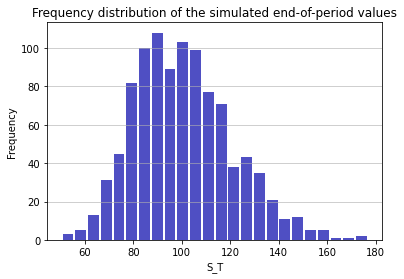

In [448]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')                          # We have plot the simulated prices into a graph and it follow a normal distribution
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

### European put value

In [449]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))                     

European put 21.643289593937194


# Black-Scholes Model

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

### BSM for  European option, no dividend 

In [353]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [354]:
euro_option_bs(99.52, 120, 1/52, 0.017, 1.44, 'put')        

22.486905079696697

In [355]:
S = np.linspace(70,200,11)                   # the range price is between 70$ and 200$ 
p = np.zeros((len(S),1))
for i in range(len(S)):
    p[i] = euro_option_bs(S[i], 120, 1/52, 0.017, 1.44, 'put')          

### Figure : Put price and payoff

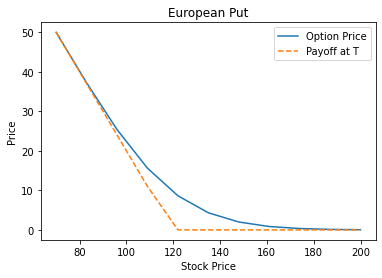

In [356]:
fig = plt.figure()
plt.plot(S, p, '-')
plt.plot(S, np.maximum(120-S,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Put')
plt.legend(['Option Price','Payoff at T'])

# GREEKS

# Delta

In [366]:
def delta(S, K, T, r, q, vol, payoff):                     # we need to define the function before calculating the delta 
    # q= 0 our SOL-USD does not have any dividend. 
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)  # standard normal distribution with a mean = 0 and std = 1
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [371]:
delta(99.52, 120, 1/52, 0.017, 0, 1.44, 'call')

0.2016828898839363

In [370]:
delta(99.52, 120, 1/52, 0.017, 0, 1.44, 'put')

-0.7983171101160638

In [375]:
S = np.linspace(70,200,11)           # We plot the figure after finding the delta.
Delta_Call = np.zeros((len(S),1))     
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i],120, 1/52, 0.017, 0, 1.44, 'call')
    Delta_Put [i] = delta(S[i], 120, 1/52, 0.017, 0, 1.44, 'put')


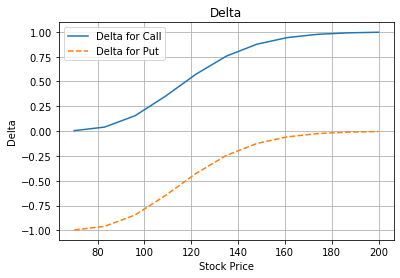

In [376]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

# Gamma

In [377]:
def gamma(S, K, T, r, q, vol, payoff):                # q= 0 because SOL-USD do not have dividend. 
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T)) 
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))       # we use pdf and not cdf because it is a standard normal distribution
    
    return gamma

In [378]:
gamma(99.52, 120, 1/52, 0.017, 0, 1.44, 'call')

0.014158315420653178

In [379]:
gamma(99.52, 120, 1/52, 0.017, 0, 1.44, 'put')      # we have the same value for put and call

0.014158315420653178

In [380]:
S = np.linspace(70,200,11)                   # we can plot the figure with a range between 70$ and 200$
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 120, 1/52, 0.017, 0, 1.44,'put')


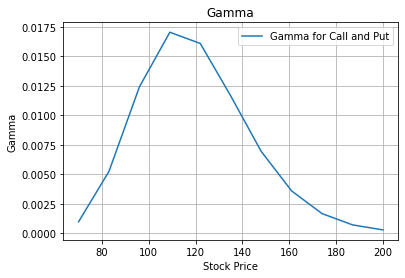

In [381]:
fig = plt.figure()                                     # we can plot the figure for call and Put
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])


# Speed

In [388]:
def speed(S, K, T, r, q, vol, payoff):                # q = 0  
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [389]:
speed(99.52, 120, 1/52, 0.017, 0, 1.44, 'put')

6.282755855816512e-05

In [390]:
S = np.linspace(70,200,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 120, 1/52, 0.017, 0, 1.44, 'put')

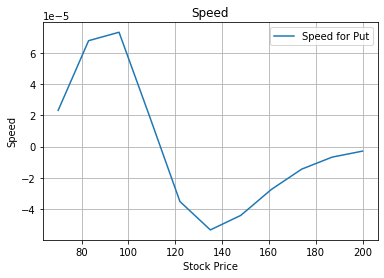

In [391]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

# Theta 

In [392]:
def theta(S, K, T, r, q, vol, payoff):              # q= 0      
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))       
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))       # this time we need d2 and d1
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta                                                                  # we want the result to be positive.

In [395]:
theta(99.52, 120, 1/52, 0.017, 0, 1.44, 'put')

147.12048183043

In [401]:
T = np.linspace(1.44,17,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(99.52, 120, T[i], 0.017, 0, 1.44, 'put')

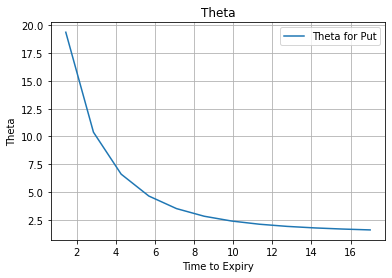

In [402]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend([ 'Theta for Put'])

# Rho

In [399]:
def rho(S, K, T, r, q, vol, payoff):      # q= 0, no dividend
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [405]:
rho(99.52, 120, 1/52, 0.017, 0, 1.44, 'put')

-1.960296613047065

In [408]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
     Rho_Put [i] = rho(9.52, 120, 1/52, r[i], 0, 1.44, 'put')

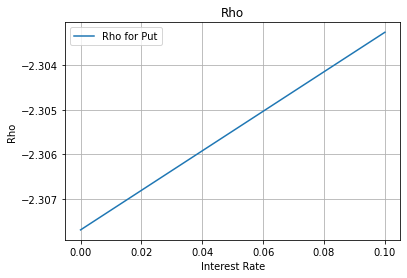

In [409]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

# Vega 

In [406]:
def vega(S, K, T, r, q, vol, payoff):         # q=0 
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega   


In [407]:
vega(99.52, 120, 1/52, 0.017, 0, 1.44, 'put')

3.8832152677483016

In [436]:
vol = np.linspace(1,6,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(99.52, 120, 1/52, 0.017, 0, vol[i], 'put')
    

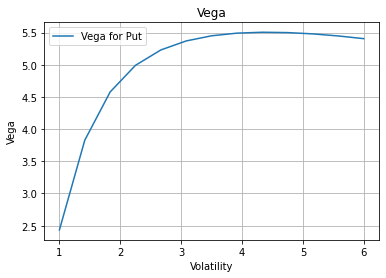

In [437]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])
